### 2D GIWAXS: Simulation & Data Analysis

Loaded POSCAR file from path: /Users/keithwhite/github_repositories/pyWAXS/examples_local/simulations/cif/MA2Pb4_K_recreated.vasp
CPU Time: 
123.92882899999995  s
Image Saved: /Users/keithwhite/github_repositories/pyWAXS/examples_local/simulations/waxs/K2PbI4 20231006_003824.png
Image Without Labels Saved: /Users/keithwhite/github_repositories/pyWAXS/examples_local/simulations/waxs/K2PbI4 20231006_003824_nolabels.png


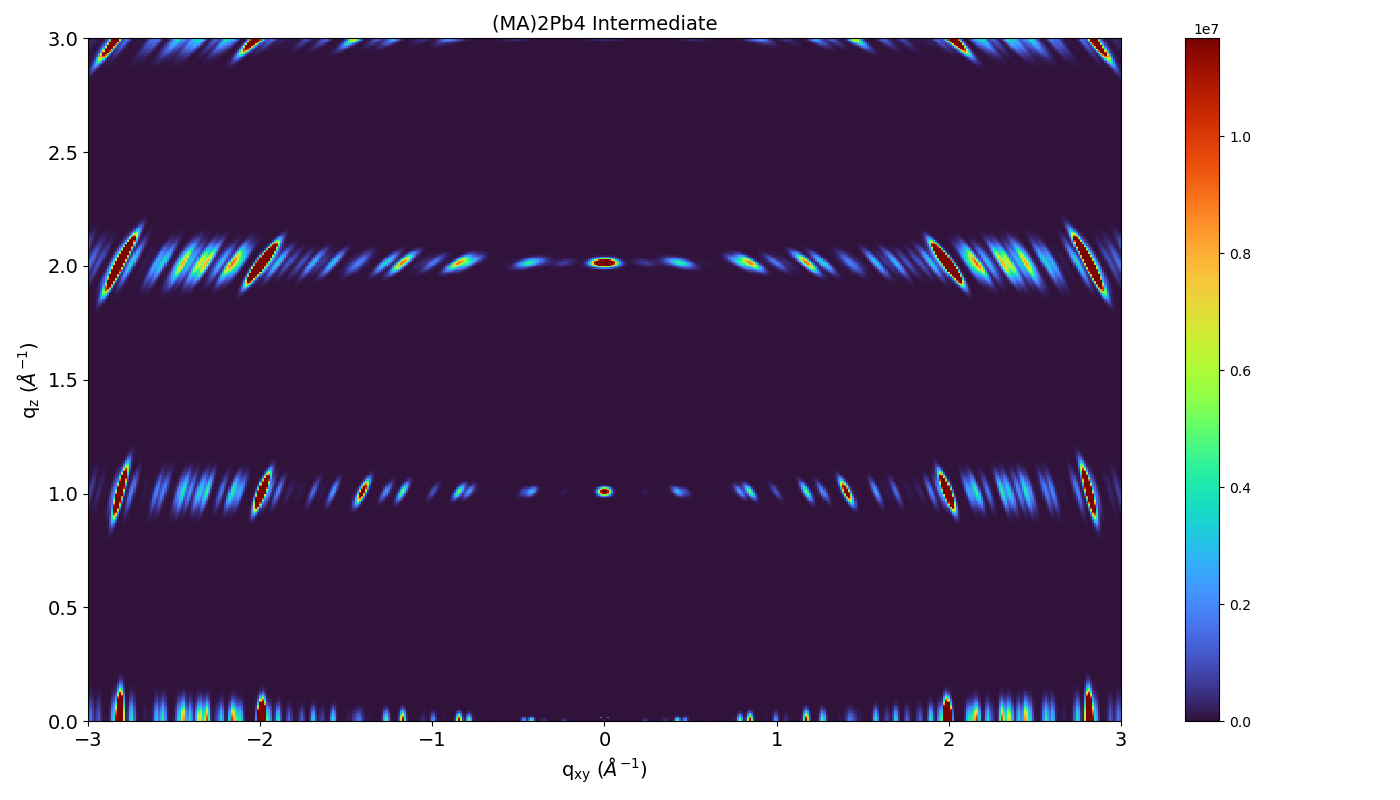

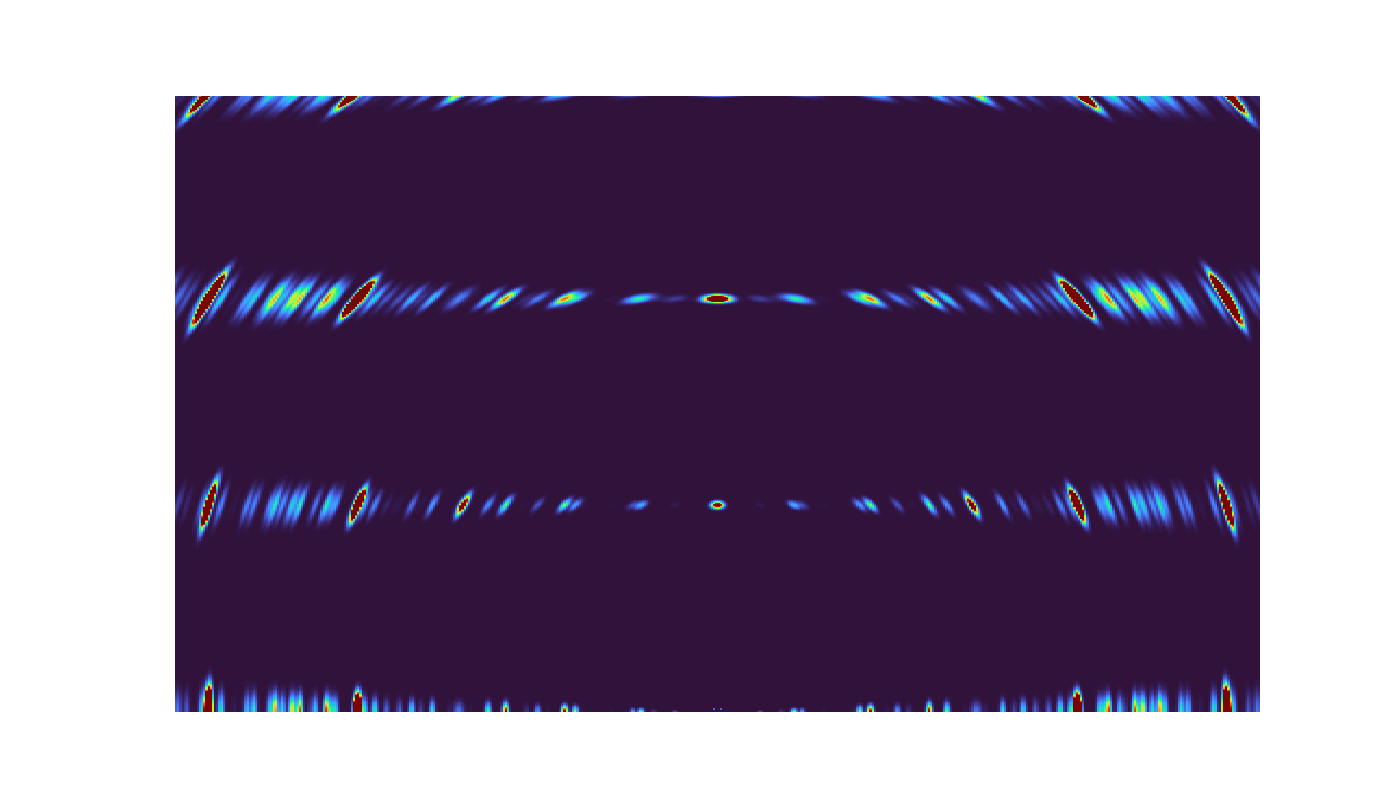

In [14]:
import os
import diffraction_script as diff
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# poscarPath = '/Users/keithwhite/github_repositories/pyWAXS/examples_local/simulations/cif/MA2Pb3Cl_K_recreated.vasp'
poscar_folder = '/Users/keithwhite/github_repositories/pyWAXS/examples_local/simulations/cif/'
savepath = '/Users/keithwhite/github_repositories/pyWAXS/examples_local/simulations/waxs/'

# ---------------------- SETUP PARAMETERS --------------------------- #
rotation_sets = [(0, 0), (np.pi/4, 0), (np.pi/2, 0), (0, np.pi/4), (0, np.pi/2), (np.pi/4, np.pi/4)]
hkl_dimension, theta_x, theta_y = 15, 0, 0
BPeakParams = [theta_x, theta_y, hkl_dimension]

sigma_theta, sigma_phi, sigma_r = 0.02, 10000, 0.01
# sigma_theta, sigma_phi, sigma_r = 10000, 0.02, 0.01
crystParams = [sigma_theta, sigma_phi, sigma_r]

resolutionx, qxymax, qzmax, qzmin = 500, 3, 3, 0
imgParams = [resolutionx, qxymax, qzmax, qzmin]

xmin, xmax, ymin, ymax, cmin, cmax, cmap, cblabel, cbsize, scaleLog = -qxymax, qxymax, 0, qzmax, 0, 99.55, 'turbo', '', 14, False
headerfontsize, xfontsize, yfontsize, tickfontsize, autosave, imgdpi, ext, colorscale, fsize = 14, 14, 14, 14, True, 96, '.png', .1, (14,8)

hklcutoff = 0.01

# - Sample Specific
header = '(MA)2Pb4 Intermediate'
samplename = 'K2PbI4'
fileStr = '*MA2Pb4_K_recreated.vasp'

plotParams = samplename, qxymax, qzmax, xmin, xmax, ymin, ymax, cmin, cmax, cmap, cblabel, cbsize, scaleLog, header, headerfontsize, xfontsize, yfontsize, tickfontsize, autosave, imgdpi, ext, colorscale, fsize, hklcutoff

# for set in rotation_sets:
#     theta_x, theta_y = set[0], set[1]
#     BPeakParams = [theta_x, theta_y, hkl_dimension]
# Run the Simulation
intensity_map, BPeaks, Mqxy, Mqz, FMiller = diff.intensitymap(poscar_folder, fileStr, BPeakParams, crystParams, imgParams)
diff.plotIntensity(intensity_map, savepath, plotParams)

#### Old Code (below)

In [ ]:
import os

paths = ["/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/2H-PbI2-Materials_Project_Corrected.vasp",
         "/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/2MA_2DMF_Pb2I6_2017Tarasov.vasp",
         "/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/2MA_2DMF_Pb2I6_2019Dahlman.vasp",
         "/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/2MA_2DMF_Pb3I8_2017Tarasov.vasp",
         "/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/2MA_2DMSO_2Pb3I8_2016Nanfeng.vasp",
         "/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/3MA_DMF_PbI5_2017Tarasov.vasp",
         "/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/4Pbwide_2023yanfa.vasp", 
         "/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/5Pbwide_2023yanfa.vasp",
         "/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/aMAPbI3_2013Kaz.vasp",
         "/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/PbI2_2DMSO_2016Nanfeng.vasp",
         "/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/PbI2_DMF_2016Nanfeng.vasp",
         "/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/PbI2_DMSO_2016Nanfeng.vasp"]

# extract filenames without extensions
filenames = [os.path.splitext(os.path.basename(path))[0] for path in paths]

# append wildcards
wildcard_filenames = [f"*{filename}*" for filename in filenames]

print(wildcard_filenames)

In [ ]:
import diffraction_script as diff
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

# ---------------------- SETUP PARAMETERS --------------------------- #
# -- Params for Calculating Expected Bragg Reflections -- #
theta_x = (np.pi/4)*2 # use theta_x and theta_y to adjust initial orientation of the sample
theta_y = (np.pi/4)*0 # use theta_x and theta_y to adjust initial orientation of the sample
hkl_dimension = 10 # number of hkl dimensions to calculate (increases comp time significantly)
BPeakParams = [theta_x, theta_y, hkl_dimension]

# -- Crystallite Orientation/Dispersity Params -- #
sigma_theta = 0.02 # sigma_theta, if you need a small number for single crystal, input~0.01, if you need infinity, input~1000
sigma_phi = 100 # sigma_phi, tunes crystallite variance in phi
sigma_r = 0.01 # sigma_r, use this to tune the peak linewidth
crystParams = [sigma_theta, sigma_phi, sigma_r]

# -- Image Params -- #
resolutionx = 1000
qxymax = 2
qzmax = 2
qzmin = 0
imgParams = [resolutionx, qxymax, qzmax, qzmin]

print ("Please ensure that POSCAR (.vasp) is exported from CIF in 'Fractional Coordinates'.")

# -- Plot Params -- #
xmin = 0
xmax = qxymax
ymin = 0
ymax = qzmax
cmin = 0
cmax = 99.55
cmap = 'turbo'
cblabel = ''
cbsize = 26
scaleLog = False
headerfontsize = 18
xfontsize = 26
yfontsize = 26
tickfontsize = 26
autosave = True
imgdpi = 500
ext = '.png'
colorscale = .1
fsize = (10,8)
hklcutoff = 0.01

# ---------------------- LOAD DATA --------------------------- #
# -- Load CIF for Simulation -- #
poscar_folder = '/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/'
fileStrs = ['*2H-PbI2-Materials_Project_Corrected*', 
           '*2MA_2DMF_Pb2I6_2017Tarasov*', 
           '*2MA_2DMF_Pb2I6_2019Dahlman*', 
           '*2MA_2DMF_Pb3I8_2017Tarasov*', 
           '*2MA_2DMSO_2Pb3I8_2016Nanfeng*', 
           '*3MA_DMF_PbI5_2017Tarasov*', 
           '*4Pbwide_2023yanfa*', 
           '*5Pbwide_2023yanfa*', 
           '*aMAPbI3_2013Kaz*', 
           '*PbI2_2DMSO_2016Nanfeng*', 
           '*PbI2_DMF_2016Nanfeng*', 
           '*PbI2_DMSO_2016Nanfeng*']

# -- Generate Simulated CIF Data  -- #
savepath = '/Users/keithwhite/github_repositories/giwaxs_suite/simdata_files/'

# ---------------------- RUN SIMULATION --------------------------- #
headers = ['2H-PbI2 (Simulated)', 
          '(MA)2 (DMF)2 Pb2I6 (Simulated)', 
          '(MA)2 (DMF)2 Pb2I6 (Simulated)', 
          '(MA)2 (DMF)2 Pb3I8 (Simulated)', 
          '(MA)2 (DMSO)2 Pb3I8 (Simulated)', 
          '(MA)3 DMF PbI5 (Simulated)', 
          '4-Pb Wide (Simulated)', 
          '5-Pb Wide (Simulated)', 
          'aMAPbI3 (Simulated)', 
          'PbI2 2DMSO (Simulated)', 
          'PbI2 DMF (Simulated)', 
          'PbI2 DMSO (Simulated)']

samplenames = ['2H-PbI2', 
               'MA2_DMF2_Pb2I6', 
               'MA2_DMF2_Pb2I6', 
               'MA2_DMF2_Pb3I8', 
               'MA2_DMSO2_Pb3I8', 
               'MA3_DMF_PbI5', 
               '4-Pb_Wide', 
               '5-Pb_Wide', 
               'aMAPbI3', 
               'PbI2_2DMSO', 
               'PbI2_DMF', 
               'PbI2_DMSO']


plotParams = samplename, qxymax, qzmax, xmin, xmax, ymin, ymax, cmin, cmax, cmap, cblabel, cbsize, scaleLog, header, headerfontsize, xfontsize, yfontsize, tickfontsize, autosave, imgdpi, ext, colorscale, fsize, hklcutoff
intensity_map, BPeaks, Mqxy, Mqz, FMiller = diff.intensitymap (poscar_folder, fileStr, BPeakParams, crystParams, imgParams)

# ---------------------- PLOT SIMULATED DATA --------------------------- #
# -- Run Plotting Function  -- 
diff.plotIntensity (intensity_map, savepath, plotParams) # w/o (h k l) indexing

# diff.plot_hklindex(intensity_map, savepath, Mqxy, Mqz, FMiller, plotParams, imgParams, BPeakParams) # w/ (h k l) indexing

# -- Experimental Data Comparison -- #
# Note: 'datapath' should be post-processed image data in CSV format.
# datapath = '/Users/keithwhite/Desktop/activedata/mar23_nslsii_11bmcms_data/mar23_nslsii_11bmcms_data_kwhite/solnum_comp_filt_molar_purgerate_sub_solvol_sampnum/sam27_3MAI1PbI2_unfilt_1p0M_5p0scfh_Si_30uL_046/maxs/3MAI1PbI2_DMF_1M_0.3deg_sam27_3MAI1PbI2_unfilt_1p0M_5p0scfh_Si_30uL_046_1749.9s_x0.017_th0.300_0.49s_986653_001639_maxs_20230328_002926_20230328_002926/qmapcsv/sam27_3MAI1PbI2_unfilt_1p0M_5p0scfh_Si_30uL_046_1749.9s_x0.017_th0.300_0.49s_986653_001639_maxs_qmap2D_20230328_002927_.csv'
# diff.splitmap(datapath, intensity_map, savepath, plotParams)

In [ ]:
import diffraction_script as diff
import numpy as np

%matplotlib widget

# ---------------------- SETUP PARAMETERS --------------------------- #
theta_x = (np.pi/4)*2
theta_y = (np.pi/4)*0
hkl_dimension = 10
BPeakParams = [theta_x, theta_y, hkl_dimension]

sigma_theta = 0.02
sigma_phi = 100
sigma_r = 0.01
crystParams = [sigma_theta, sigma_phi, sigma_r]

resolutionx = 300
qxymax = 2.5
qzmax = 2.5
qzmin = 0
imgParams = [resolutionx, qxymax, qzmax, qzmin]

xmin = -qxymax
xmax = qxymax
ymin = 0
ymax = qzmax
cmin = 0
cmax = 99.55
cmap = 'turbo'
cblabel = ''
cbsize = 26
scaleLog = False
headerfontsize = 18
xfontsize = 22
yfontsize = 22
tickfontsize = 22
autosave = True
imgdpi = 500
ext = '.png'
colorscale = .1
fsize = (10,8)
hklcutoff = 0.01

poscar_folder = '/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/'
savepath = '/Users/keithwhite/github_repositories/giwaxs_suite/simdata_files/'

fileStrs = ['*2H-PbI2-Materials_Project_Corrected*', 
           '*2MA_2DMF_Pb2I6_2017Tarasov*', 
           '*2MA_2DMF_Pb2I6_2019Dahlman*', 
           '*2MA_2DMF_Pb3I8_2017Tarasov*', 
           '*2MA_2DMSO_2Pb3I8_2016Nanfeng*', 
           '*3MA_DMF_PbI5_2017Tarasov*', 
           '*4Pbwide_2023yanfa*', 
           '*5Pbwide_2023yanfa*', 
           '*aMAPbI3_2013Kaz*', 
           '*PbI2_2DMSO_2016Nanfeng*', 
           '*PbI2_DMF_2016Nanfeng*', 
           '*PbI2_DMSO_2016Nanfeng*']

headers = ['2H-PbI2 (Simulated)', 
          '(MA)2 (DMF)2 Pb2I6 (Simulated)', 
          '(MA)2 (DMF)2 Pb2I6 (Simulated)', 
          '(MA)2 (DMF)2 Pb3I8 (Simulated)', 
          '(MA)2 (DMSO)2 Pb3I8 (Simulated)', 
          '(MA)3 DMF PbI5 (Simulated)', 
          '4-Pb Wide (Simulated)', 
          '5-Pb Wide (Simulated)', 
          'aMAPbI3 (Simulated)', 
          'PbI2 2DMSO (Simulated)', 
          'PbI2 DMF (Simulated)', 
          'PbI2 DMSO (Simulated)']

samplenames = ['2H-PbI2', 
               'MA2_DMF2_Pb2I6', 
               'MA2_DMF2_Pb2I6', 
               'MA2_DMF2_Pb3I8', 
               'MA2_DMSO2_Pb3I8', 
               'MA3_DMF_PbI5', 
               '4-Pb_Wide', 
               '5-Pb_Wide', 
               'aMAPbI3', 
               'PbI2_2DMSO', 
               'PbI2_DMF', 
               'PbI2_DMSO']

# for i in range(len(fileStrs)):
i = 0
header = headers[i]
samplename = samplenames[i]
fileStr = fileStrs[i]

plotParams = samplename, qxymax, qzmax, xmin, xmax, ymin, ymax, cmin, cmax, cmap, cblabel, cbsize, scaleLog, header, headerfontsize, xfontsize, yfontsize, tickfontsize, autosave, imgdpi, ext, colorscale, fsize, hklcutoff

intensity_map, BPeaks, Mqxy, Mqz, FMiller = diff.intensitymap(poscar_folder, fileStr, BPeakParams, crystParams, imgParams)
diff.plotIntensity(intensity_map, savepath, plotParams) 

Loaded POSCAR file from path: /Users/keithwhite/github_repositories/giwaxs_suite/cif_files/2MA_2DMF_Pb3I8_2017Tarasov.vasp
CPU Time: 
12.890227  s
Image Saved: /Users/keithwhite/github_repositories/giwaxs_suite/simdata_files/MA2_DMF2_Pb3I8 20230606_165514.png
Image Without Labels Saved: /Users/keithwhite/github_repositories/giwaxs_suite/simdata_files/MA2_DMF2_Pb3I8 20230606_165515_nolabels.png


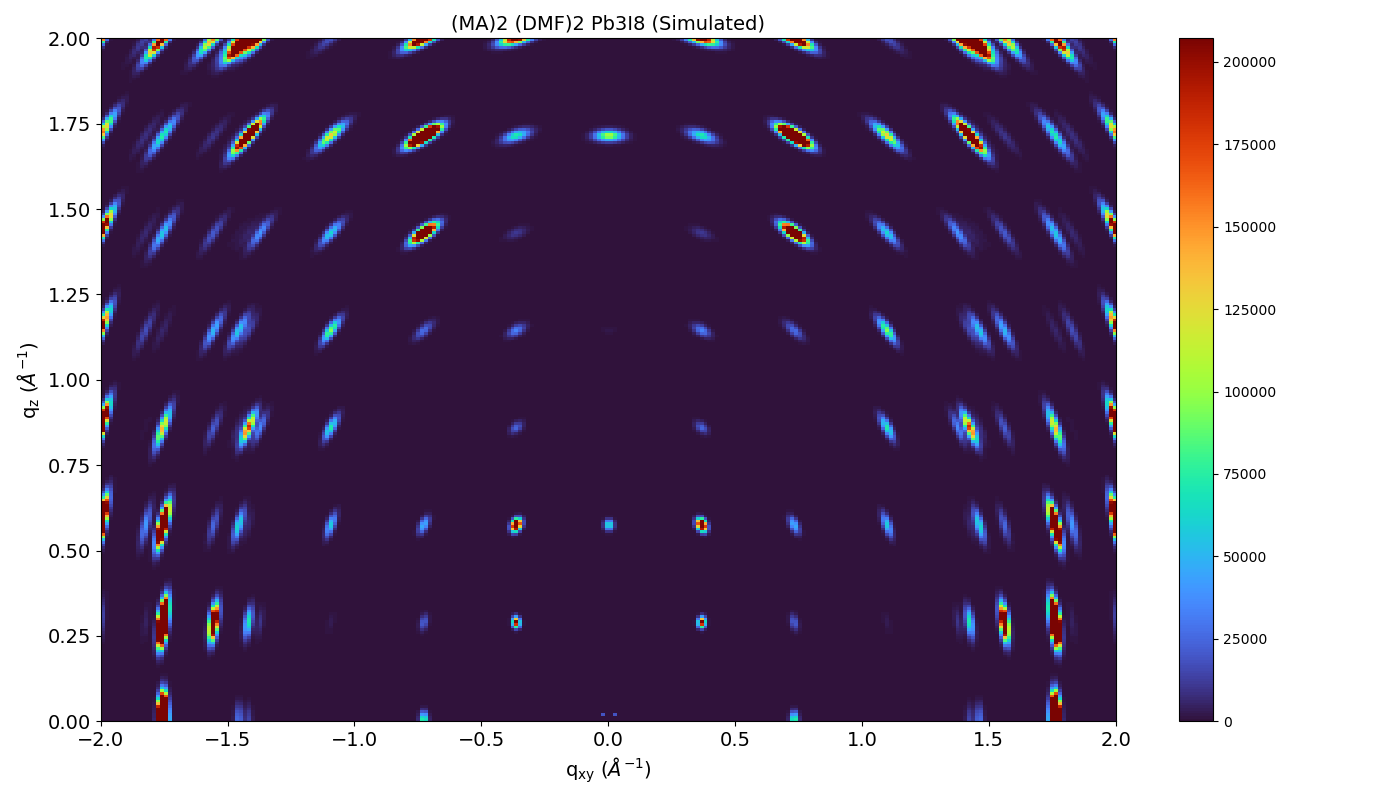

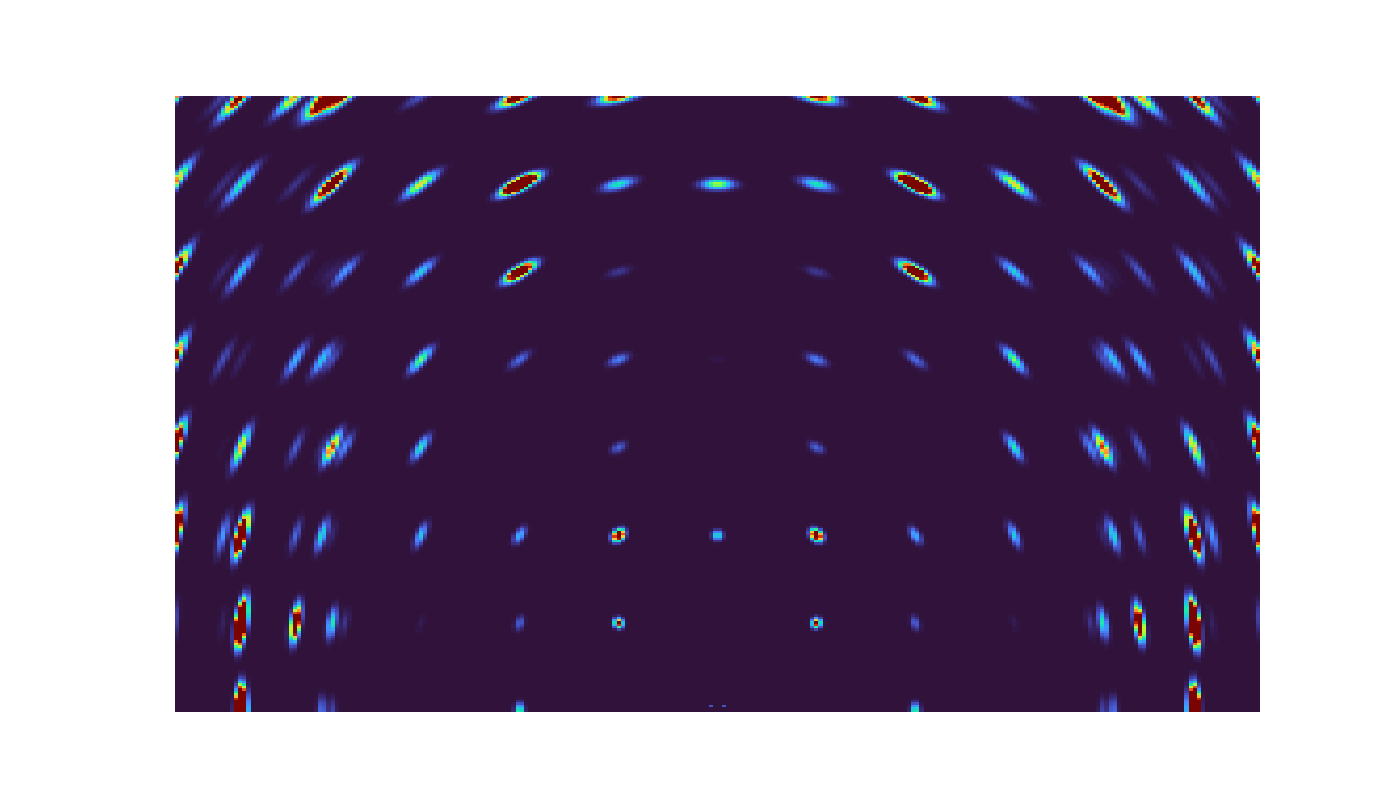

In [3]:
import diffraction_script as diff
import numpy as np

%matplotlib widget

# ---------------------- SETUP PARAMETERS --------------------------- #
rotation_sets = [(0, 0), (np.pi/4, 0), (np.pi/2, 0), (0, np.pi/4), (0, np.pi/2), (np.pi/4, np.pi/4)]
hkl_dimension = 10
theta_x = np.pi/2
theta_y = 0
BPeakParams = [theta_x, theta_y, hkl_dimension]

sigma_theta = 0.02
sigma_phi = 100
sigma_r = 0.01
crystParams = [sigma_theta, sigma_phi, sigma_r]

resolutionx = 258
qxymax = 2
qzmax = 2
qzmin = 0
imgParams = [resolutionx, qxymax, qzmax, qzmin]

xmin = -qxymax
xmax = qxymax
ymin = 0
ymax = qzmax
cmin = 0
cmax = 99.55
cmap = 'turbo'
cblabel = ''
cbsize = 14
scaleLog = False
headerfontsize = 14
xfontsize = 14
yfontsize = 14
tickfontsize = 14
autosave = True
imgdpi = 96
ext = '.png'
colorscale = .1
fsize = (14,8)
hklcutoff = 0.01

poscar_folder = '/Users/keithwhite/github_repositories/giwaxs_suite/cif_files/'
savepath = '/Users/keithwhite/github_repositories/giwaxs_suite/simdata_files/'

fileStrs = ['*2H-PbI2-Materials_Project_Corrected.vasp', 
           '*2MA_2DMF_Pb2I6_2017Tarasov.vasp', 
        #    '*2MA_2DMF_Pb2I6_2019Dahlman*', 
           '*2MA_2DMF_Pb3I8_2017Tarasov.vasp', 
           '*2MA_2DMSO_2Pb3I8_2016Nanfeng.vasp', 
           '*3MA_DMF_PbI5_2017Tarasov.vasp', 
           '*4Pbwide_2023yanfa.vasp', 
           '*5Pbwide_2023yanfa.vasp', 
           '*aMAPbI3_2013Kaz.vasp', 
           '*PbI2_2DMSO_2016Nanfeng.vasp', 
           '*PbI2_DMF_2016Nanfeng.vasp', 
           '*PbI2_DMSO_2016Nanfeng.vasp']

headers = ['2H-PbI2 (Simulated)', 
          '(MA)2 (DMF)2 Pb2I6 (Simulated)', 
        #   '(MA)2 (DMF)2 Pb2I6 (Simulated)', 
          '(MA)2 (DMF)2 Pb3I8 (Simulated)', 
          '(MA)2 (DMSO)2 Pb3I8 (Simulated)', 
          '(MA)3 DMF PbI5 (Simulated)', 
          '4-Pb Wide (Simulated)', 
          '5-Pb Wide (Simulated)', 
          'aMAPbI3 (Simulated)', 
          'PbI2 2DMSO (Simulated)', 
          'PbI2 DMF (Simulated)', 
          'PbI2 DMSO (Simulated)']

samplenames = ['2H-PbI2', 
               'MA2_DMF2_Pb2I6', 
            #    'MA2_DMF2_Pb2I6', 
               'MA2_DMF2_Pb3I8', 
               'MA2_DMSO2_Pb3I8', 
               'MA3_DMF_PbI5', 
               '4-Pb_Wide', 
               '5-Pb_Wide', 
               'aMAPbI3', 
               'PbI2_2DMSO', 
               'PbI2_DMF', 
               'PbI2_DMSO']

# for i in range(len(fileStrs)):
i = 2
header = headers[i]
samplename = samplenames[i]
fileStr = fileStrs[i]

plotParams = samplename, qxymax, qzmax, xmin, xmax, ymin, ymax, cmin, cmax, cmap, cblabel, cbsize, scaleLog, header, headerfontsize, xfontsize, yfontsize, tickfontsize, autosave, imgdpi, ext, colorscale, fsize, hklcutoff

intensity_map, BPeaks, Mqxy, Mqz, FMiller = diff.intensitymap(poscar_folder, fileStr, BPeakParams, crystParams, imgParams)
diff.plotIntensity(intensity_map, savepath, plotParams)
# intensity_maps = []
# for theta_x, theta_y in rotation_sets:
#    BPeakParams = [theta_x, theta_y, hkl_dimension]
#    intensity_map, BPeaks, Mqxy, Mqz, FMiller = diff.intensitymap(poscar_folder, fileStr, BPeakParams, crystParams, imgParams)
#    intensity_maps.append(intensity_map)
# diff.plotIntensityGrid(intensity_maps, savepath, plotParams, rotation_sets) 
